In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import datetime
import scipy
import scipy.stats as stats
import seaborn as sns

In [ ]:
data=pd.read_excel('/content/Online Retail.xlsx')

In [ ]:
print(data.head())
print(data.shape)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Preprocessing

In [ ]:
# removing null values
print(data.isnull().value_counts())
data=data[~(data.CustomerID.isnull())]
print(data.shape)
print(data.isnull().value_counts())

In [ ]:
# creating additional field using existing fields
data['Amount']=data['Quantity']*data['UnitPrice']

In [ ]:
data.groupby('Country').CustomerID.count().reset_index()

,Country,CustomerID
0,Australia,1259
1,Austria,401
2,Bahrain,17
3,Belgium,2069
4,Brazil,32
5,Canada,151
6,Channel Islands,758
7,Cyprus,622
8,Czech Republic,30
9,Denmark,389


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 <a list of 37 Text major ticklabel objects>)

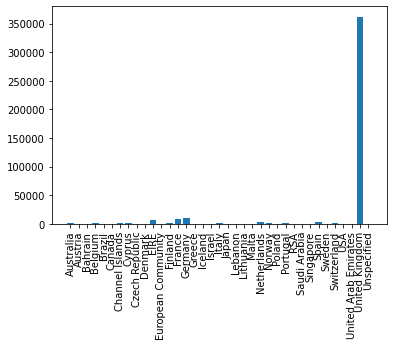

In [ ]:
plt.bar(data.groupby('Country').CustomerID.count().reset_index().Country,data.groupby('Country').CustomerID.count().reset_index().CustomerID)
plt.xticks(rotation=90)

In [ ]:
# keeping only UK data as all other data are very less (outliers)
data2=data[data.Country=='United Kingdom']
data2.shape

In [ ]:
# checking for negative prices and removing it
data2[data2.Amount<=0].value_counts()
data2=data2[data2.Amount>0]

InvoiceNo  StockCode  Description                         Quantity  InvoiceDate          UnitPrice  CustomerID  Country         Amount 
C543611    82483      WOOD 2 DRAWER CABINET WHITE FINISH  -1        2011-02-10 14:38:00  4.95       17850.0     United Kingdom  -4.95      4
C538341    22725      ALARM CLOCK BAKELIKE CHOCOLATE      -1        2010-12-10 14:03:00  3.75       15514.0     United Kingdom  -3.75      3
           22976      CIRCUS PARADE CHILDRENS EGG CUP     -12       2010-12-10 14:03:00  1.25       15514.0     United Kingdom  -15.00     3
           22730      ALARM CLOCK BAKELIKE IVORY          -1        2010-12-10 14:03:00  3.75       15514.0     United Kingdom  -3.75      3
C555723    22171      3 HOOK PHOTO SHELF ANTIQUE WHITE    -2        2011-06-06 16:21:00  8.50       15737.0     United Kingdom  -17.00     2
                                                                                                                                          ..
C566613    D      

In [ ]:
# analyzing data
data2.info()
data2.InvoiceDate.min()
data2.InvoiceDate.max()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      354321 non-null  object        
 8   Amount       354321 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
# calculating recency
reference_date=data2.InvoiceDate.max()+datetime.timedelta(days=1)
(reference_date-data2.InvoiceDate).astype('timedelta64[D]')

In [ ]:
data2['recency']=(reference_date-data2.InvoiceDate).astype('timedelta64[D]')
print(data2)

In [ ]:
recency_=data2.groupby('CustomerID')['recency'].min().reset_index()
recency_

In [ ]:
data2.groupby('CustomerID').sum()

,Quantity,UnitPrice,Amount
CustomerID,,,
12346.0,74215,1.04,77183.60
12747.0,1275,449.89,4196.01
12748.0,25747,12205.60,33719.73
12749.0,1471,994.99,4090.88
12820.0,722,112.38,942.34
...,...,...,...
18280.0,45,47.65,180.60
18281.0,54,39.36,80.82
18282.0,103,62.39,178.05


In [ ]:
monetary=data2[['CustomerID','Amount']].groupby('CustomerID').sum().reset_index()
monetary

In [ ]:
recency_c=data2[['CustomerID','recency']]
recency_c

,CustomerID,recency
0,17850.0,374.0
1,17850.0,374.0
2,17850.0,374.0
3,17850.0,374.0
4,17850.0,374.0
...,...,...
541889,15804.0,1.0
541890,13113.0,1.0
541891,13113.0,1.0
541892,13113.0,1.0


In [ ]:
temp=monetary.merge(recency_,how='outer')
temp

In [ ]:
freq=data2[['CustomerID','Amount']].groupby('CustomerID').count().reset_index()
freq.rename(columns={'Amount':'Frequency'},inplace=True)
freq

In [ ]:
# we got final processed data
processed_data=temp.merge(freq,how='outer')
processed_data.isnull().value_counts()

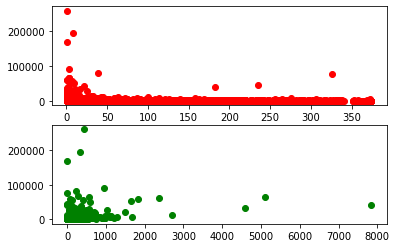

In [ ]:
plt.subplot(2,1,1)
plt.scatter(processed_data['recency'],processed_data['Amount'],c='r')
plt.subplot(2,1,2)

plt.scatter(processed_data['Frequency'],processed_data['Amount'],c='g')


In [ ]:
# creating copy of processed data as a backup
backup=processed_data.copy()

In [ ]:
from sklearn import preprocessing
processed_data['Amount_proc']=processed_data['Amount'].apply(math.log)
processed_data['recency_proc']=processed_data['recency'].apply(math.log)
processed_data['frequency_proc']=processed_data['Frequency'].apply(math.log)


In [ ]:
feature_vec=['Amount_proc','recency_proc','frequency_proc']
X=processed_data[feature_vec].values
scalar=preprocessing.StandardScaler()
X_scaled=scalar.fit_transform(X)

In [ ]:
processed_data

,CustomerID,Amount,recency,Frequency,Amount_proc,recency_proc,frequency_proc
0,12346.0,77183.60,326.0,1,11.253942,5.786897,0.000000
1,12747.0,4196.01,2.0,103,8.341889,0.693147,4.634729
2,12748.0,33719.73,1.0,4595,10.425838,0.000000,8.432724
3,12749.0,4090.88,4.0,199,8.316515,1.386294,5.293305
4,12820.0,942.34,3.0,59,6.848366,1.098612,4.077537
...,...,...,...,...,...,...,...
3915,18280.0,180.60,278.0,10,5.196285,5.627621,2.302585
3916,18281.0,80.82,181.0,7,4.392224,5.198497,1.945910
3917,18282.0,178.05,8.0,12,5.182064,2.079442,2.484907
3918,18283.0,2094.88,4.0,756,7.647252,1.386294,6.628041


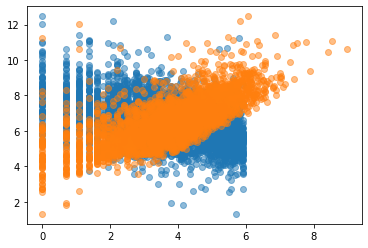

In [ ]:
plt.scatter(processed_data.recency_proc,processed_data.Amount_proc,alpha=0.5)
plt.scatter(processed_data.frequency_proc,processed_data.Amount_proc,alpha=0.5)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X=X_scaled

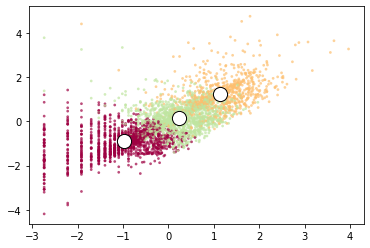

In [ ]:
import matplotlib.cm as cm

clusterer=KMeans(n_clusters=3,random_state=10)
cluster_labels=clusterer.fit_predict(X)
feature1=2
feature2=0
cmap = cm.get_cmap("Spectral")
colors=cmap(cluster_labels.astype(float)/3)

plt.scatter(X[:,feature1],X[:,feature2],marker='.',s=30,
                lw=0,alpha=0.7,edgecolor='k',c=colors)
centers=clusterer.cluster_centers_
plt.scatter(centers[:,feature1],centers[:,feature2],marker="o",
                alpha=1,c='white',s=200,edgecolor='k')
plt.show()


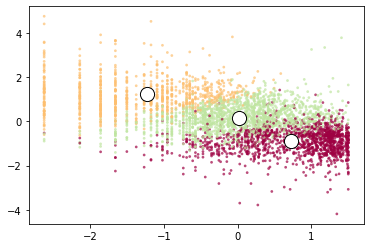

In [ ]:
import matplotlib.cm as cm

clusterer=KMeans(n_clusters=3,random_state=10)
cluster_labels=clusterer.fit_predict(X)
feature1=1
feature2=0
cmap = cm.get_cmap("Spectral")
colors=cmap(cluster_labels.astype(float)/3)

plt.scatter(X[:,feature1],X[:,feature2],marker='.',s=30,
                lw=0,alpha=0.7,edgecolor='k',c=colors)
centers=clusterer.cluster_centers_
plt.scatter(centers[:,feature1],centers[:,feature2],marker="o",
                alpha=1,c='white',s=200,edgecolor='k')
plt.show()